# **Building CNN for CIFAR-10 dataset**


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# load dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
# confirm scale of pixels
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
# Getting the number of classes 
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


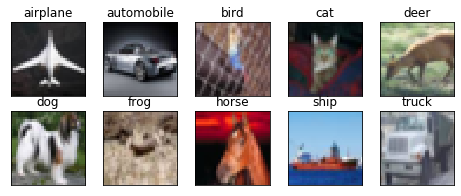

In [0]:
# Allocating the the label names to labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
# printing the images from CIFAR-10 along with its labels
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    # print(img_num)
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

**Function to Plot the model accuracy and loss**

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

# **Function to define the accuarcy of the model**

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

# **Standardizing the input features and also one hot encoding target values**

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# **Base model only with normal convolution**

In [0]:
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))  # input shape: 32X32X3  | (3X3X3)X48    | Output shape: 32X32X48 | RF: 3X3  
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))                                               # input shape: 32X32X48 | (3X3X3)X48    | Output shape: 30X30X48 | RF: 5X5
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))                                        # input shape: 30X30X48 | MP (2X2)      | Output shape: 15X15X48 | RF: 10X10
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))                           # input shape: 15X15X48 | (3X3X48)X96   | Output shape: 15X15X96 | RF: 12X12
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))                                               # input shape: 15X15X96 | (3X3X96)X96   | Output shape: 13X13X96 | RF: 14X14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                        # input shape: 13X13X96 | MP (2X2)      | Output shape: 6X6X96   | RF: 28X28
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))                          # input shape: 6X6X96   | (3X3X96)X192  | Output shape: 6X6X192  | RF: 30X30
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))                                              # input shape: 6X6X192  | (3X3X192)X192 | Output shape: 4X4X192  | RF: 32X32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                        # input shape: 4X4X192  | MP(2X2)       | Output shape: 2X2X192  | RF: 64X64
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))                                                            # input shape: 2X2X192  | Dense layer   | Output shape: 512X1    | RF: 64X64
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))                                                            # input shape:  512X1   | Dense layer   | Output shape: 256X1    | RF: 64X64                                                      
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()





Epoch 1/100





390/390 [==============================] - 30s 76ms/step - loss: 1.8163 - acc: 0.3039 - val_loss: 1.4472 - val_acc: 0.4864
Epoch 2/100
390/390 [==============================] - 21s 54ms/step - loss: 1.3268 - acc: 0.5228 - val_loss: 1.1093 - val_acc: 0.6034
Epoch 3/100
390/390 [==============================] - 21s 54ms/step - loss: 1.1195 - acc: 0.6047 - val_loss: 0.9910 - val_acc: 0.6456
Epoch 4/100
390/390 [==============================] - 21s 54ms/step - loss: 0.9779 - acc: 0.6596 - val_loss: 0.8868 - val_acc: 0.6939
Epoch 5/100
390/390 [==============================] - 21s 54ms/step - loss: 0.8833 - acc: 0.6958 - val_loss: 0.7584 - val_acc: 0.7400
Epoch 6/100
390/390 [==============================] - 21s 54ms/step - loss: 0.8109 - acc: 0.7216 - val_loss: 0.7375 - val_acc: 0.7484
Epoch 7/100
390/390 [==============================] - 21s 54ms/step - loss: 0.7587 - acc: 0.7413 - val_loss: 0.7303 - val_acc: 0.7534
Epoch 8/100
390/390 [==========================

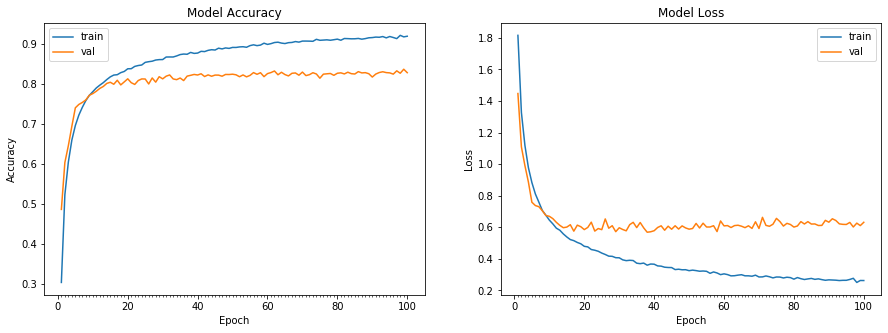

Accuracy on test data is: 82.77


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

#image augmentation
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# **Model accuracy of the base model at the last epoch is 82.77% with 1172410 parameters. Model execution time is 2100.31 seconds**


# **6A** **Model 2: Corrected Network**

In [0]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # input shape: 32X32X3  | (3X3X3)X64      | Output shape: 32X32X64   | RF: 3X3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same'))                          # input shape: 32X32X64 | (3X3X64)X64     | Output shape: 32X32X64   | RF: 5X5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))                                        # input shape: 32X32X64 | MP (2X2)        | Output shape: 16X16X64   | RF:10X10
model.add(Convolution2D(32, 1, 1, border_mode='same'))                          # input shape: 16X16X64 | (1X1X64)X32     | Output shape: 16X16X32   | RF:10X10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(64, 3, 3, border_mode='same'))                          # input shape: 16X16X32 | (3X3X32)X64     | Output shape: 16X16X64   | RF:12X12
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same'))                          # input shape: 16X16X64 | (3X3X64)X64     | Output shape: 16X16X64   | RF:14X14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))                                        # input shape: 16X16X64 | MP (2X2)        | Output shape: 8X8X64     | RF:28X28
model.add(Convolution2D(32, 1, 1, border_mode='same'))                          # input shape: 8X8X64   | (1X1X64)X32     | Output shape: 8X8X32     | RF:28X28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3, border_mode='same'))                         # input shape: 8X8X32   | (3X3X32)X128    | Output shape: 8X8X128    | RF:30X30
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same'))                         # input shape: 8X8X128  | (3X3X128)X128   | Output shape: 8X8X128    | RF:32X32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, 1, border_mode='same'))                          # input shape: 8X8X128   | MP(2X2)        | Output shape: 4X4X32     | RF:64X64
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))                             # input shape: 4X4X128   | Dense(10)      | Output shape: 10X1       | RF:64X64
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update yo

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), padding="same")`


# **Using data geneartor to augment the CIFAR 10 data - by rotating and flipping to identify images in real world scenario**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_features)

# **Defining a function for L2 loss**

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import keras.backend as K
import numpy as np
lmbda=0.01
# L2 Regularization
def reg_term(lmbda):
  w2=0
  for i in range(len(model.layers)):
    if len(model.layers[i].get_weights())>0:
      t=np.sum(model.layers[i].get_weights()[0]*model.layers[i].get_weights()[0])
      w2=w2*t
  w2=w2*(lmbda/(2*train_features.shape[0]))
  return w2
def l2_loss(y_true, y_pred):
  return K.categorical_crossentropy(y_true, y_pred)+reg_term(lmbda)
# Learning rate scheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
#fitting model and compiling the model
model.compile(optimizer=Adam(lr=0.003), loss=l2_loss, metrics=['accuracy'])

# **Running the model and plotting the model accuracy**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  """


Epoch 1/100
390/390 [==============================] - 45s 116ms/step - loss: 1.5356 - acc: 0.4361 - val_loss: 4.1923 - val_acc: 0.2192
Epoch 2/100
390/390 [==============================] - 44s 112ms/step - loss: 1.1416 - acc: 0.5887 - val_loss: 1.2025 - val_acc: 0.5918
Epoch 3/100
390/390 [==============================] - 43s 109ms/step - loss: 0.9731 - acc: 0.6540 - val_loss: 1.2303 - val_acc: 0.5909
Epoch 4/100
390/390 [==============================] - 42s 107ms/step - loss: 0.8758 - acc: 0.6923 - val_loss: 0.9512 - val_acc: 0.6758
Epoch 5/100
390/390 [==============================] - 44s 112ms/step - loss: 0.8080 - acc: 0.7155 - val_loss: 1.0907 - val_acc: 0.6542
Epoch 6/100
390/390 [==============================] - 42s 107ms/step - loss: 0.7610 - acc: 0.7339 - val_loss: 1.1261 - val_acc: 0.6452
Epoch 7/100
390/390 [==============================] - 43s 111ms/step - loss: 0.7256 - acc: 0.7470 - val_loss: 1.0708 - val_acc: 0.6497
Epoch 8/100
390/390 [===========================

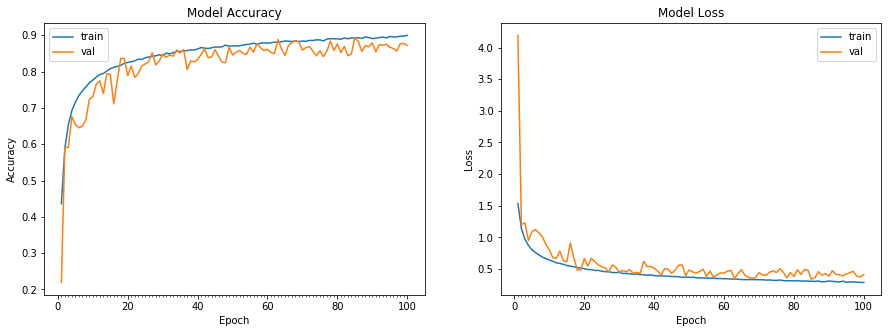

Accuracy on test data is: 87.23


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# **Model accuracy at the 100th epoch is 87.23% with only 294570 parameters which is less compared to the base model. However the model execution time is 4231.62 seconds. This increase in time may be due to the custom defined learning  rate.**

# **6B:Functional API** 

# **Model with spatially separable convolution, depthwise separable  convolution and grouped convolution**

In [0]:
from keras.layers import Concatenate,Input,SeparableConv2D
from keras.models import Model
inputs=Input(shape=(32,32,3))
x= Convolution2D(32, (3, 3), padding='same')(inputs)           # input shape: 32X32X3   | (3X3X3)X32       | Output shape: 32X32X32     | RF: 3X3
x=BatchNormalization()(x)
x=Activation('relu')(x)
# layer1b=layers.relu()
x= Convolution2D(32, (3, 1), padding='same')(x)                # input shape: 32X32X32  | (3X1X32)X32      | Output shape: 32X32X32     | RF: 5X5
x=BatchNormalization()(x)
x=Activation('relu')(x)
x= Convolution2D(32, (1, 3), padding='same')(x)                # input shape: 32X32X32  | (1X3X32)X32      | Output shape: 32X32X32     | RF: 5X5
x=BatchNormalization()(x)
x=Activation('relu')(x)

x=SeparableConv2D(64,(3,3),padding='same')(x)                  # input shape: 32X32X32  | (3X3X32)X64      | Output shape: 32X32X64     | RF: 7X7
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Convolution2D(128,(3,3),padding='same')(x)                   # input shape: 32X32X64  | (3X3X64)X128     | Output shape: 32X32X128   | RF: 9X9
x=BatchNormalization()(x)
x=Activation('relu')(x)

x=MaxPooling2D(pool_size=(2,2))(x)                             # input shape: 32X32X128 | MP(2X2)          | Output shape: 16X16X128   | RF: 18X18
x=Convolution2D(32,(1,1),padding='same')(x)                    # input shape: 32X32X128 | (1X1X128)X32    | Output shape: 16X16X32    | RF: 18X18
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dropout(0.25)(x)


G1=Convolution2D(64,(3,3),padding='same')(x)                   # input shape: 16X16X32 | (1X1XX32)X64    | Output shape: 16X16X64      | RF: 20X20
G1=BatchNormalization()(G1)
G1=Activation('relu')(G1)
G2=Convolution2D(64,(5,5),padding='same')(x)                   # input shape: 16X16X64 | (1X1XX32)X64    | Output shape: 16X16X64      | RF: 20X20
G2=BatchNormalization()(G2)
G2=Activation('relu')(G2)
x=concatenate([G1,G2])                                         # 16X16X64 (grouped convolution)) 16X16X64| Output shape: 16X16X128     | RF: 20X20

x=MaxPooling2D(pool_size=(2,2))(x)                             # input shape: 16X16X128 | MP(2X2)          | Output shape: 8X8X128     | RF: 40X40
x=Convolution2D(32,(1,1),padding='same')(x)                    # input shape: 8X8X128   | (1X1X28)X32        | Output shape: 8X8X32      | RF: 40X40
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dropout(0.25)(x)

x=Convolution2D(64,(3,3),padding='same')(x)                    # input shape: 8X8X32     | (3X3X32)X64          | Output shape: 8X8X64     | RF: 42X42
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Convolution2D(64,(3,3),padding='same',dilation_rate=1)(x)    # input shape: 8X8X64     | (3X3X64)X64          | Output shape: 8X8X64     | RF: 42X42
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Convolution2D(64,(3,3),padding='same',dilation_rate=2)(x)    # input shape: 8X8X64     | (3X3X64)X64          | Output shape: 8X8X64     | RF: 46X46
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)                             # input shape: 8X8X64     | MP(2X2)              | Output shape: 4X4X64     | RF: 92X92
x=Convolution2D(32,(1,1),padding='same')(x)                    # input shape: 4X4X64     |(1X1X64)X32           | Output shape: 4X4X32     | RF: 92X92
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dropout(0.25)(x)
x=Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)                # input shape: 4X4X32     |dense(10)           | Output shape: 10X1    | RF: 92X92


model=Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_152 (Conv2D)             (None, 32, 32, 32)   896         input_32[0][0]                   
__________________________________________________________________________________________________
batch_normalization_122 (BatchN (None, 32, 32, 32)   128         conv2d_152[0][0]                 
__________________________________________________________________________________________________
activation_128 (Activation)     (None, 32, 32, 32)   0           batch_normalization_122[0][0]    
___________________________________________________________________________________________

In [0]:
model.compile(optimizer=Adam(lr=0.003), loss=l2_loss, metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 59s 151ms/step - loss: 1.5666 - acc: 0.4253 - val_loss: 2.3393 - val_acc: 0.4020
Epoch 2/50
390/390 [==============================] - 51s 130ms/step - loss: 1.1458 - acc: 0.5876 - val_loss: 1.4806 - val_acc: 0.5178
Epoch 3/50
390/390 [==============================] - 51s 130ms/step - loss: 0.9660 - acc: 0.6551 - val_loss: 2.0356 - val_acc: 0.4644
Epoch 4/50
390/390 [==============================] - 50s 129ms/step - loss: 0.8624 - acc: 0.6956 - val_loss: 0.9873 - val_acc: 0.6499
Epoch 5/50
390/390 [==============================] - 50s 128ms/step - loss: 0.7986 - acc: 0.7199 - val_loss: 1.2021 - val_acc: 0.6207
Epoch 6/50
390/390 [==============================] - 50s 129ms/step - loss: 0.7522 - acc: 0.7375 - val_loss: 0.8950 - val_acc: 0.6899
Epoch 7/50
390/390 [==============================] - 50s 129ms/step - loss: 0.7137 - acc: 0.7513 - val_loss: 0.7813 - val_acc: 0.7399
Epoch 8/50
390/390 [==============================] - 5

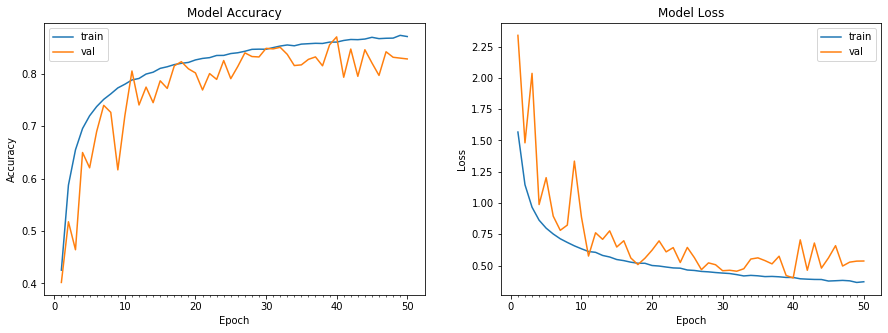

Accuracy on test data is: 82.84


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# **Model accuracy is 82.84 a the 50th epoch with 263754 parameters (least among the three models). and it took 2519.34 seconds which is less than the previous model because of grouped convolutions and simpler computations.**